# Data Analysis

## Load and Inspect Data

In [26]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_processing import load_train_and_test_data

train_data, test_data = load_train_and_test_data()

train_instances_count = train_data.shape[0]
print(f"Training instances: {train_instances_count}")

Training data instances: 10886


In [27]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [28]:
test_instances_count = test_data.shape[0]
print(f"Test instances: {test_instances_count}")

Test data instances: 6493


In [29]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [30]:
import pandas as pd

data_types = train_data.dtypes
pd.DataFrame(data_types, columns=['Type'])

,Data Type
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


Conclusions:
- Target variables: casual, registered, count
- Possible categorical features based on sample values: season, holiday, workingday, weather
- Datetime requires conversion from datetime[ns] format to an int64 type timestamp

## Data Cleaning and Preprocessing

### Handling Missing Values

In [31]:
missing_values = train_data.isnull().sum()
pd.DataFrame(missing_values, columns=["Count"])

,Count
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [32]:
missing_values = test_data.isnull().sum()
pd.DataFrame(missing_values, columns=["Count"])

,Count
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0


### Handling Duplicate Rows

In [33]:
duplicates_count = train_data.duplicated().sum()
print(f"Duplicate rows count: {duplicates_count}")

Duplicate rows count: 0


In [34]:
duplicates_count = test_data.duplicated().sum()
print(f"Duplicate rows count: {duplicates_count}")

Duplicate rows count: 0


### Adjusting Data Types

In [35]:
from data_processing import convert_datetime_to_timestamp

train_data_converted = convert_datetime_to_timestamp(train_data)
train_data_converted[["datetime"]].head()

,datetime
0,359400
1,359401
2,359402
3,359403
4,359404


In [36]:
unique_values = train_data.nunique()
pd.DataFrame(unique_values, columns=["Unique Values Count"])

,Unique Values Count
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


Conclusions:
- Season, holiday, workingday and weather should be converted from numerical to categorical
- Datetime is unique for each instance

In [37]:
from data_processing import perform_categorical_conversion

train_data_processed = perform_categorical_conversion(train_data_converted)
data_types_after_processing = train_data_processed.dtypes
pd.DataFrame(data_types_after_processing, columns=["Type"])

,Type
datetime,int64
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Exploratory Data Analysis (EDA)

## Univariate Analysis of Numerical Features

#### Summary Statistics

In [38]:
from config import TARGET_VARIABLES

feature_data = train_data.drop(columns=TARGET_VARIABLES)
numerical = feature_data.select_dtypes(
    include=['float64', 'int64']).columns

def calculate_numerical_statistics(columns, data):
    basic_stats = data[columns].describe()
    extended_stats = basic_stats.T
    
    extended_stats['median'] = data[columns].median()
    extended_stats['variance'] = data[columns].var()
    extended_stats['range'] = data[columns].max() - \
        data[columns].min()
    extended_stats['iqr'] = data[columns].quantile(
        0.75) - data[columns].quantile(0.25)
    extended_stats['skewness'] = data[columns].skew()
    extended_stats['kurtosis'] = data[columns].kurtosis()
    
    return extended_stats

calculate_numerical_statistics(numerical, feature_data)

,count,mean,std,min,25%,50%,75%,max,median,variance,range,iqr,skewness,kurtosis
datetime,10886.0,368045.939555,5052.135948,359400.00,363775.2500,368180.500,372540.7500,376655.0000,368180.500,2.552408e+07,17255.0000,8765.5000,-0.000989,-1.202427
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000,20.500,6.070887e+01,40.1800,12.3000,0.003691,-0.914530
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550,24.240,7.181886e+01,44.6950,14.3950,-0.102560,-0.850076
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000,62.000,3.703713e+02,100.0000,30.0000,-0.086335,-0.759818
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969,12.998,6.665967e+01,56.9969,9.9964,0.588767,0.630133


Conclusions:
- Datetime scale is significantly larger compared to other features
- Datetime shows highest variability, followed by humidity
- Features likely to have outliers (range > 2 * IQR): temp, atemp, humidity, windspeed
- Windspeed has largest range relative to its IQR, indicating significant outlier influence
- Datetime has smallest range relative to its IQR, indicating minimal outlier influence
- All features have acceptable levels of skewness and kurtosis, with atemp being the most skewed

#### Distributions

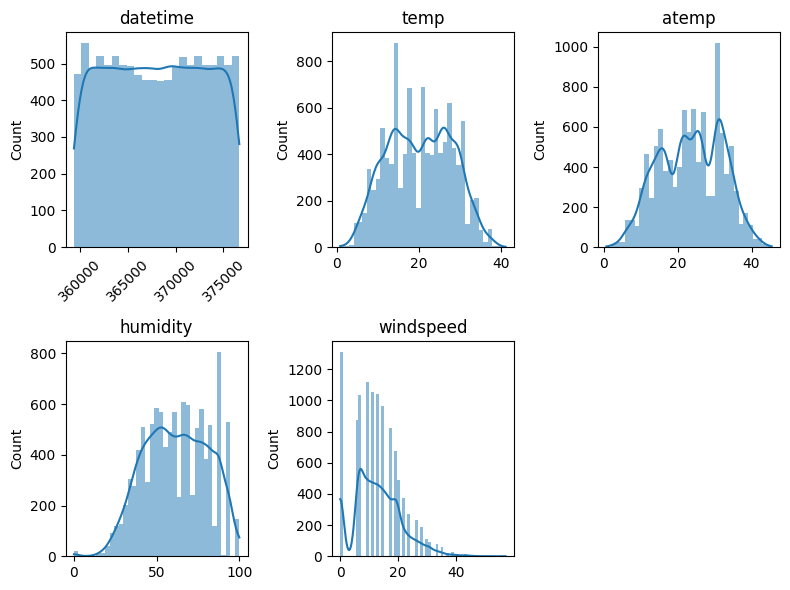

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_subplots_layout(columns):
    num_features = len(columns)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols
    
    return num_rows, num_cols

def rotate_xticklabels_if_long(ax, label_length_threshold=5, rotation_angle=45):
    labels = [item.get_text() for item in ax.get_xticklabels()]
    if any(len(label) > label_length_threshold for label in labels):
        ax.tick_params(axis='x', labelrotation=rotation_angle)

def plot_numerical_distributions(columns, data):
    num_rows, num_cols = calculate_subplots_layout(columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3*num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(columns):
        sns.histplot(data[feature], ax=axes[i], kde=True, edgecolor=None)
        axes[i].set_title(feature)
        axes[i].set_xlabel('')
        rotate_xticklabels_if_long(axes[i])

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_distributions(numerical, feature_data)

#### Outliers

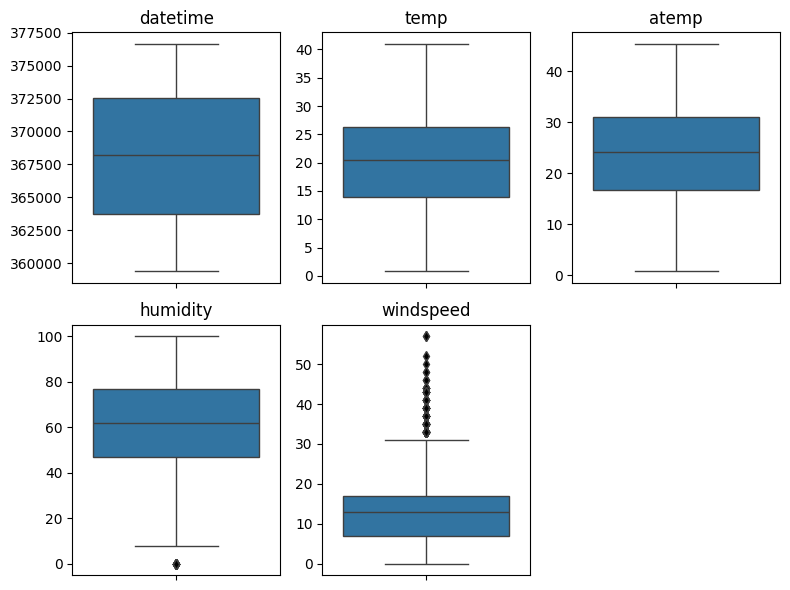

In [40]:
def plot_numerical_outliers(columns, data):
    flierprops = dict(marker='d', markerfacecolor='black', markersize=5)

    num_rows, num_cols = calculate_subplots_layout(columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3*num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(columns):
        sns.boxplot(data=data, y=feature, ax=axes[i], flierprops=flierprops)
        axes[i].set_title(feature)
        axes[i].set_ylabel('')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_outliers(numerical, feature_data)

## Univariate Analysis of Categorical Features

#### Summary Statistics

In [41]:
categorical = feature_data.select_dtypes(
    include=['category']).columns

feature_data[categorical].describe()

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


#### Distributions

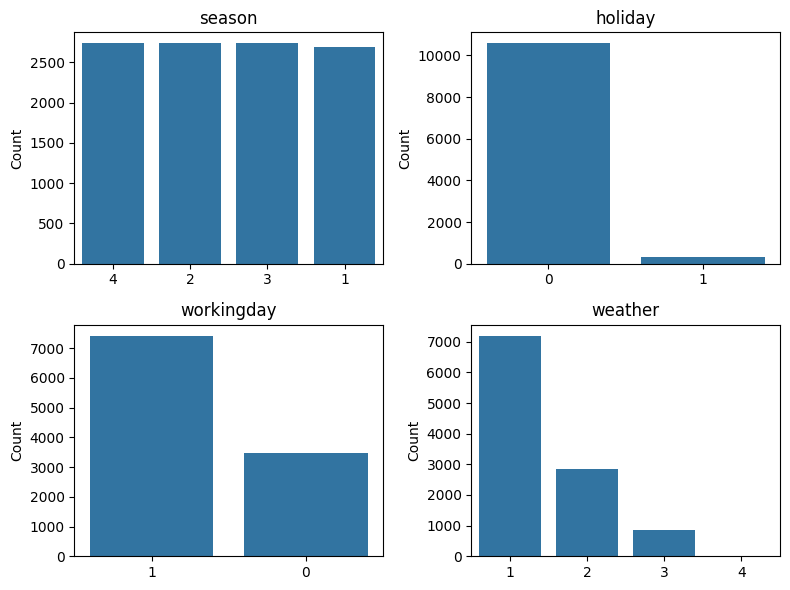

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(data=feature_data, x=col,
                  ax=axes[i], order=feature_data[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Univariate Analysis of Target Variables

#### Summary Statistics

In [43]:
class_data = train_data[TARGET_VARIABLES]
calculate_numerical_statistics(TARGET_VARIABLES, class_data)

,count,mean,std,min,25%,50%,75%,max,median,variance,range,iqr,skewness,kurtosis
casual,10886.0,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0,17.0,2496.049219,367,45.0,2.495748,7.551629
registered,10886.0,155.552177,151.039033,0.0,36.0,118.0,222.0,886.0,118.0,22812.789514,886,186.0,1.524805,2.626081
count,10886.0,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0,145.0,32813.313153,976,242.0,1.242066,1.300093


#### Transform Data

In [44]:
import numpy as np

transformed_class_data = class_data.copy()
transformed_class_data = transformed_class_data.apply(
    lambda x: np.log(x + 1))
calculate_numerical_statistics(TARGET_VARIABLES, class_data)

,count,mean,std,min,25%,50%,75%,max,median,variance,range,iqr,skewness,kurtosis
casual,10886.0,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0,17.0,2496.049219,367,45.0,2.495748,7.551629
registered,10886.0,155.552177,151.039033,0.0,36.0,118.0,222.0,886.0,118.0,22812.789514,886,186.0,1.524805,2.626081
count,10886.0,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0,145.0,32813.313153,976,242.0,1.242066,1.300093


#### Distributions

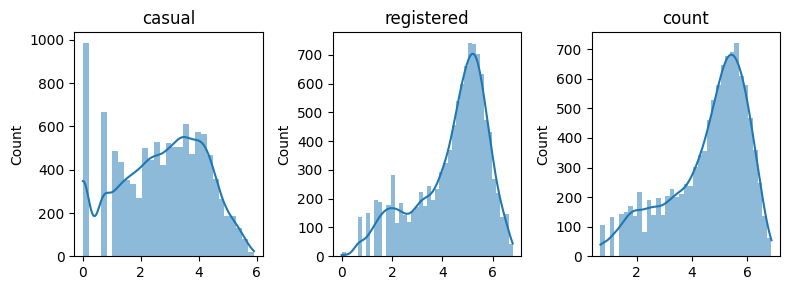

In [45]:
plot_numerical_distributions(TARGET_VARIABLES, transformed_class_data)

#### Outliers

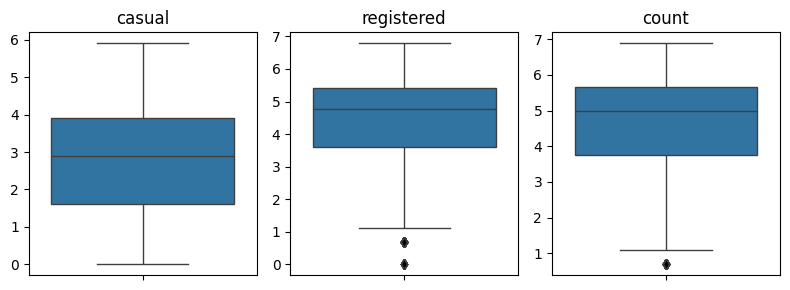

In [46]:
plot_numerical_outliers(TARGET_VARIABLES, transformed_class_data)

## Bivariate Analysis of Numerical - Numerical Features

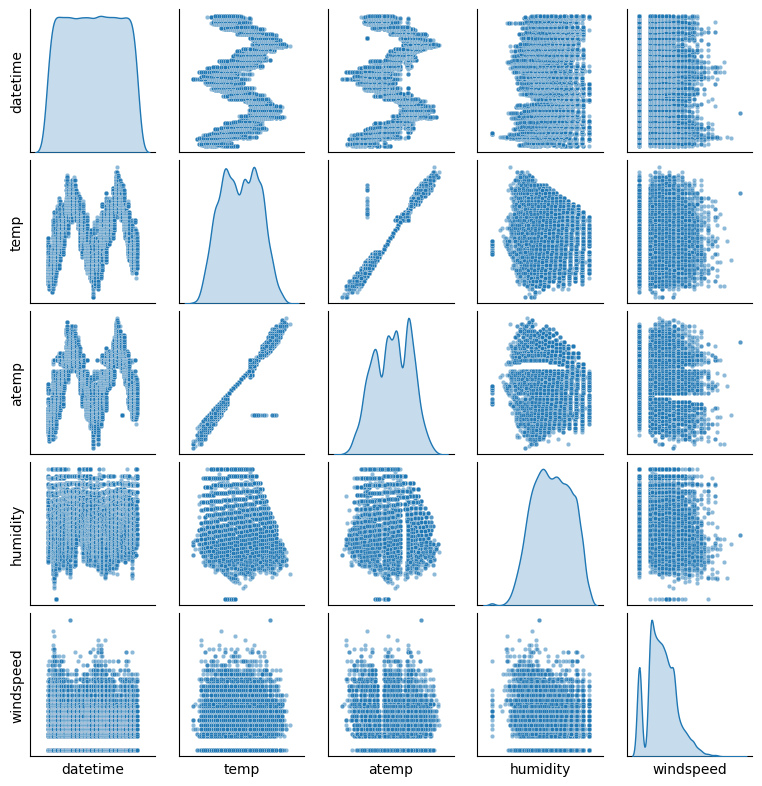

In [47]:
pairplot = sns.pairplot(feature_data[numerical], plot_kws={'s': 10, 'alpha': 0.5},
             diag_kind='kde')

pairplot.figure.set_size_inches(8, 8)

for ax in pairplot.axes.flatten():
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()